<a href="https://colab.research.google.com/github/ashfiya-06/GenAi_2303A52366/blob/main/GenAI_Assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6311 - loss: 0.6821 - val_accuracy: 0.6031 - val_loss: 0.6838
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6189 - loss: 0.6822 - val_accuracy: 0.6062 - val_loss: 0.6838
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6248 - loss: 0.6814 - val_accuracy: 0.6062 - val_loss: 0.6838
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6169 - loss: 0.6819 - val_accuracy: 0.6062 - val_loss: 0.6837
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6221 - loss: 0.6825 - val_accuracy: 0.6062 - val_loss: 0.6837
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6149 - loss: 0.6830 - val_accuracy: 0.6062 - val_loss: 0.6837
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6264 - loss: 0.6811 - val_accuracy: 0.6062 - val_loss: 0.6837
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6431 - loss: 0.6799 - val_accuracy: 0.6062 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.609375
Confusion Matrix:
 [[ 88  53]
 [ 72 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.58       141
           1       0.67      0.60      0.63       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.62      0.61      0.61       320



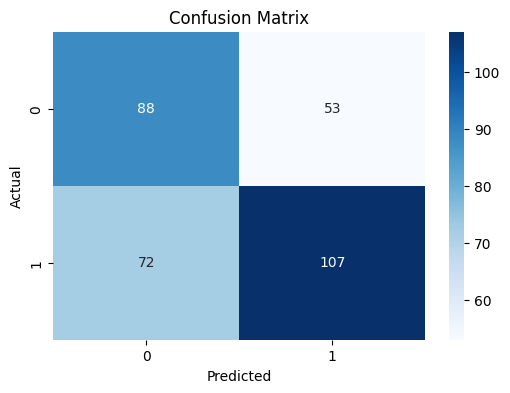

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Good Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/winequality-red.csv'
df = pd.read_csv(file_path)

# Splitting features and target
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target

# Convert target into a binary classification (good/bad wine)
y = (y >= 6).astype(int)  # Wine quality >=6 is good (1), otherwise bad (0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Save the model
model.save("wine_quality_ann.h5")

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Load and use the model for prediction
def predict_wine_quality(sample):
    loaded_model = keras.models.load_model("wine_quality_ann.h5")
    sample = scaler.transform([sample])
    prediction = loaded_model.predict(sample)
    return "Good Wine" if prediction > 0.5 else "Bad Wine"

# Example usage
sample_data = X_test[0]  # First test sample
prediction = predict_wine_quality(sample_data)
print("Prediction:", prediction)
